<a href="https://colab.research.google.com/github/JebinAbraham/Linear-Regression/blob/main/Linear-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

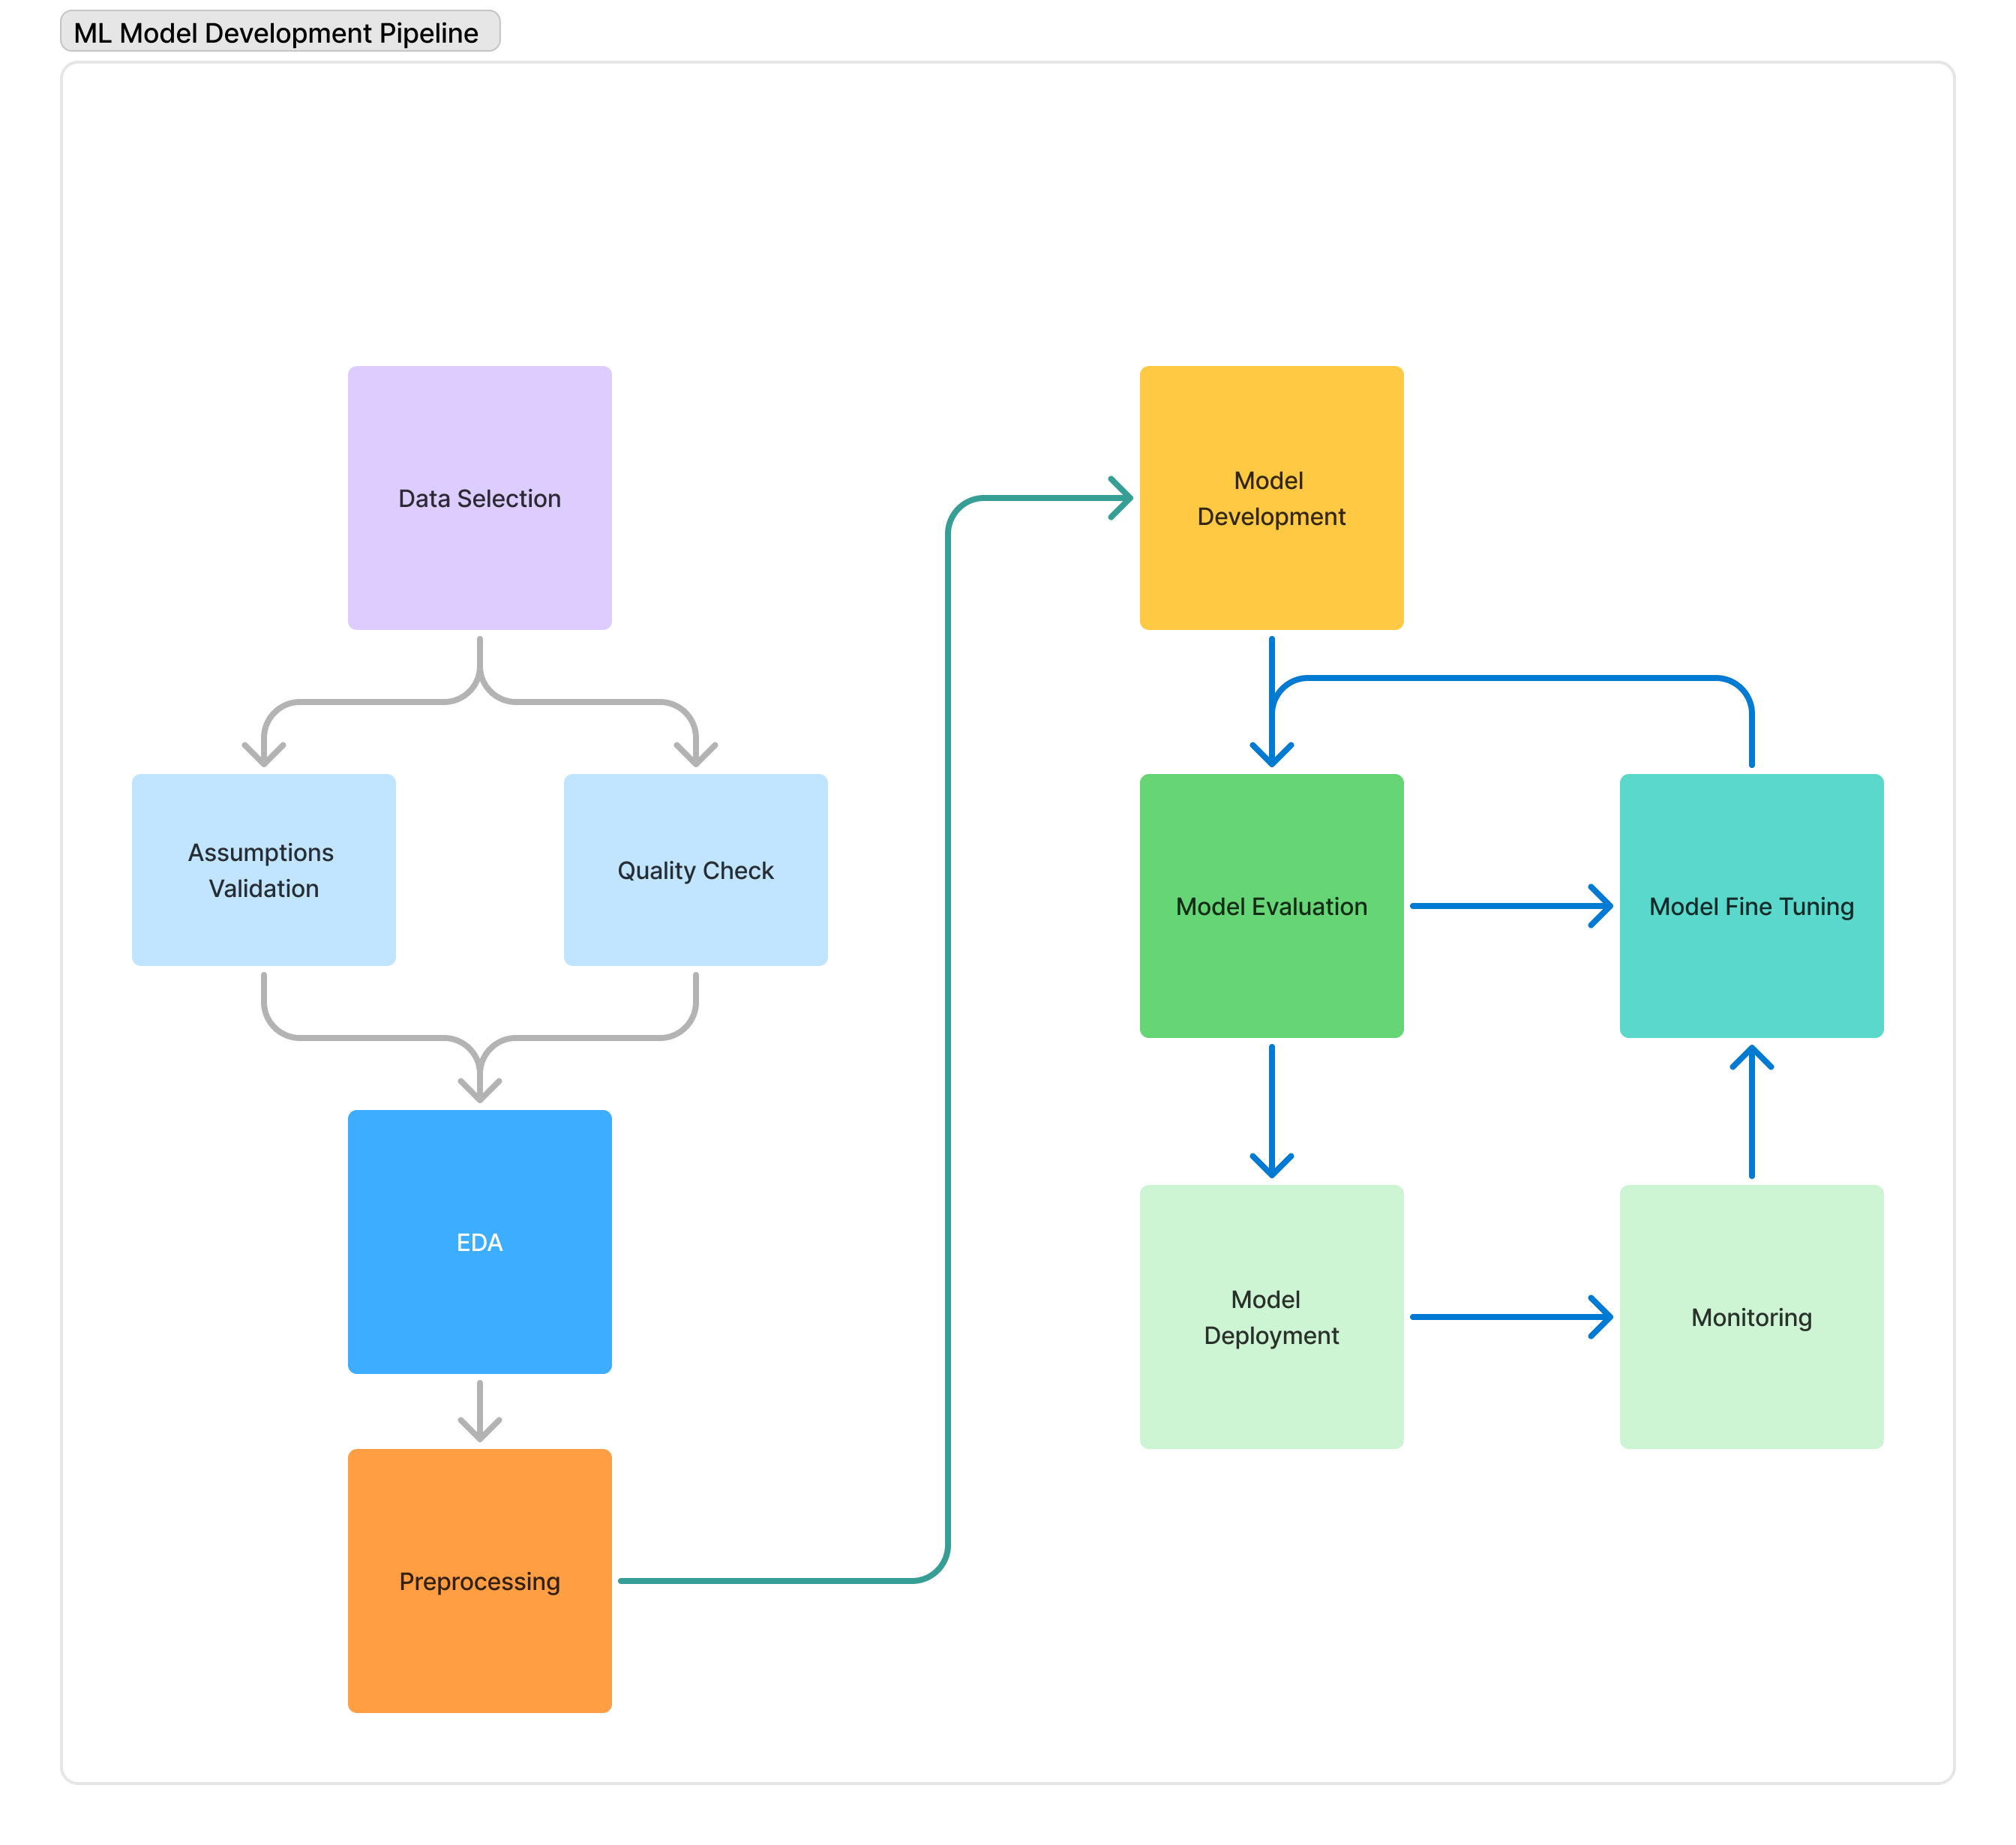

# Data Collection


In [1]:
!pip install ucimlrepo

# Exploratory Data Analysis

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [9]:
#check for missing values
print("missing values in features ",X.isnull().sum())
print("missing values in target " ,y.isnull().sum())

missing values in features  fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64
missing values in target  quality    0
dtype: int64


# Data Preprocessing

In [3]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


# Assumption Validation

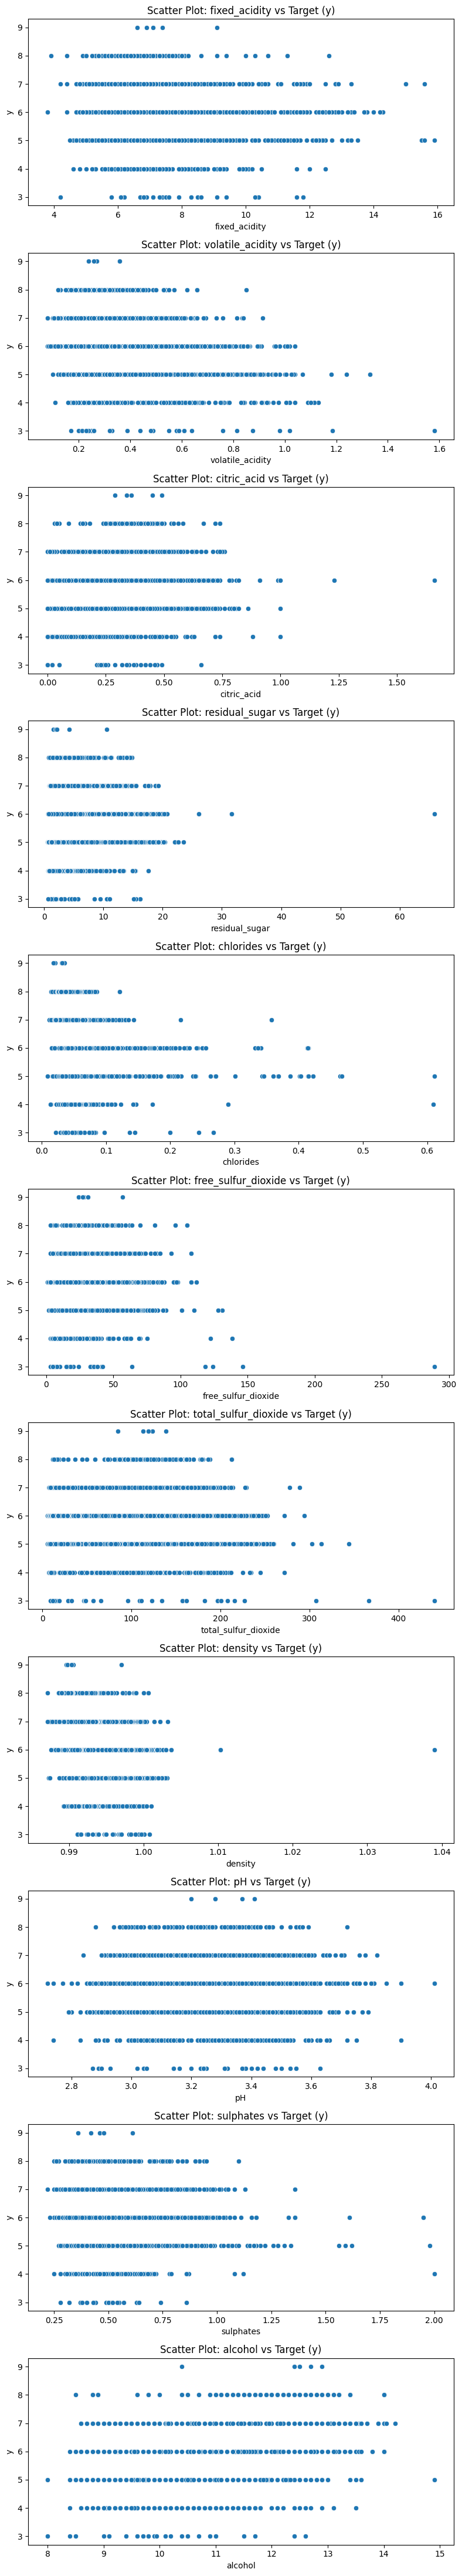


Feature vs Target Correlation:
                      Pearson Correlation with y
fixed_acidity                          -0.076743
volatile_acidity                       -0.265699
citric_acid                             0.085532
residual_sugar                         -0.036980
chlorides                              -0.200666
free_sulfur_dioxide                     0.055463
total_sulfur_dioxide                   -0.041385
density                                -0.305858
pH                                      0.019506
sulphates                               0.038485
alcohol                                 0.444319


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Scatter plots of each feature against the target variable y
num_features = X.shape[1]
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(8, 4 * num_features))

for i, col in enumerate(X.columns):
    sns.scatterplot(x=X[col], y=y.iloc[:, 0], ax=axes[i])  # Assuming y has one column
    axes[i].set_title(f"Scatter Plot: {col} vs Target (y)")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("y")

plt.tight_layout()
plt.show()

# Compute Pearson correlation coefficients
correlation_matrix = X.corrwith(y.iloc[:, 0]).to_frame(name="Pearson Correlation with y")

# Display correlation values
print("\nFeature vs Target Correlation:")
print(correlation_matrix)

**Analysis of Scatter Plots for Linearity**

From the scatter plots, we can interpret the linearity assumption for linear regression:
1.	Alcohol vs Target (y):

  •	Shows a somewhat linear trend.

	•	This aligns with the correlation (0.4443), indicating it is a strong predictor.

2.	Volatile Acidity & Density:

  •	Show a negative trend.

	•	These align with their negative correlation values (-0.2657 and -0.3058).

3.	Other Features (Fixed Acidity, Residual Sugar, pH, etc.):

  •	Appear scattered with no clear linear trend.

	•	These have low correlation values, indicating weak linear relationships.




**Conclusion on Linearity**

✅ Alcohol and Density have some linearity, making them suitable for linear regression.
⚠️ Other features may need transformation (log, polynomial) or feature selection.

# Model Development

# Model Evaluation

# Conclusion